In [ ]:
import math
import numpy as np

In [ ]:
0.8/math.sqrt(2)

In [ ]:
state_1 = np.array([0.8, 0.6])
state_2 = np.array([1 / np.sqrt(2), 1j / np.sqrt(2)]) 
print(state_1)
print(state_2)

In [ ]:
np.dot(np.conj(state_2),state_1)

In [ ]:
np.dot(np.conj(state_1),state_2)

In [ ]:
print(state_2)
print(np.conj(state_2))
print(np.conjugate(state_2))

In [ ]:
State = np.array([1 / np.sqrt(2), 1j / np.sqrt(2)])
def measure_state(state, num_meas=10):
    x_prob = state[0] * np.conj(state[0])
    x_prob = x_prob.real
    y_prob = state[1] * np.conj(state[1])
    y_prob = y_prob.real
    choice_ = [0,1]
    arr = np.random.choice(choice_,num_meas,p=[x_prob,y_prob])
    return arr
measure_state(State)

In [ ]:
np.square(0.8) + np.square(0.6)

In [ ]:
1j * 1j

In [ ]:
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])
H = [[1/np.sqrt(2),1/np.sqrt(2)],
                 [1/np.sqrt(2),-1/np.sqrt(2)]]

T = [[1,0],[0,np.exp(1j * np.pi/4)]]
S = [[1,0],[0,-1]]
Z = [[1,0],[0,-1]]
Y = [[0,-1j],[1j,0]]
X = [[0,1],[1,0]]


In [ ]:
H_T = np.matmul(T,H)
H_T_S = np.matmul(S,H_T)
H_S_T_H = np.matmul(H,H_T_S)
ans = np.matmul(H_S_T_H,ket_0)
print(ans)

In [ ]:
np.matmul(np.matmul(H,X),H)

In [ ]:
np.matmul(np.matmul(X,Y),ket_0) == 1j * np.matmul(Z,ket_0)

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.
    
    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    ket_0 = np.array([1,0])
    
    ket_1 = np.array([0,1])
    return ket_0

In [ ]:
def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)

In [ ]:
def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome

In [ ]:
def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.
    
    Try and do so using three lines of code or less!
    
    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """
    
    ##################
    # YOUR CODE HERE #
    new_state = apply_u(initialize_state())
    measure_state_temp = measure_state(new_state,100)
    return(measure_state_temp)
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass

In [ ]:
quantum_algorithm()

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.
    
    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    ket_0 = np.array([1,0])
    ket_1 = np.array([0,1])
    return ket_0

    # PREPARE THE STATE |0>   
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.
    
    Try and do so using three lines of code or less!
    
    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """
    
    ##################
    # YOUR CODE HERE #
    new_state = apply_u(initialize_state())
    measure_state_temp = measure_state(new_state,100)
    return(measure_state_temp)
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass


In [ ]:
quantum_algorithm()

In [ ]:
import pennylane as qml

def my_circuit(theta, phi): 
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)
    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])
my_circuit(90,180)

In [ ]:
#To run any quantum 
dev = qml.device('default.qubit', wires=['wire_a','wire_b'])


## Creating QNode

In [ ]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    qml.RX(theta,wires=0)
    qml.RY(phi,wires=1)
    qml.RZ(omega,wires=2)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0])
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    



    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################
    qml.QubitUnitary(U,wires=0)
    # USE QubitUnitary TO APPLY U TO THE QUBIT
    


    # Return the state
    return qml.state()


In [ ]:
apply_u()

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Rot(phi, theta, omega,wires = 0)
    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    
    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()
theta, phi, omega = 0.1, 0.2, 0.3
apply_u_as_rot(theta, phi, omega )


In [ ]:
import pennylane as qml
dev = qml.device("default.qubit",wires = 1)

In [ ]:
@qml.qnode(dev)
def HPH(state):
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
ket_0 = np.array([1,0])
ket_1 = np.array([0,1])



In [ ]:
print(HPH(ket_0).real,ket_0)
print(HPH(ket_1).real,ket_1)

In [ ]:
@qml.qnode(dev)
def apply_Z_to_plus():
    ket_0 = np.array([1,0])
    qml.Hadamard(wires = 0)
    qml.PauliZ(wires = 0)
    return qml.state()
apply_Z_to_plus()

In [ ]:
#Using RZ gate to obtain same effect on |+>
dev = qml.device("default.qubit",wires = 1)
@qml.qnode(dev)
def fake_z():
    qml.Hadamard(wires = 0)
    qml.RZ(np.pi,wires = 0)
    return qml.state()
    

In [ ]:
fake_z()

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0 )
    qml.S(wires=0)
    # qml.T(wires = 0)
    qml.adjoint(qml.T)(wires = 0)
    qml.RZ(0.3,wires = 0)
    # qml.S(wires = 0)
    qml.adjoint(qml.S)(wires = 0)
    return qml.state()
    # IMPLEMENT THE CIRCUIT

    # RETURN THE STATE


many_rotations()

In [ ]:
import pennylane as qml
dev = qml.device('default.qubit',wires = 3)
qml.qnode(dev)
def just_enough():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.S(wires=0)
    qml.Hadamard(wires = 0)
    qml.adjoint(qml.S)(wires = 0)
    qml.Hadamard(wires=0)
    qml.T(wires=1)
    qml.Hadamard(wires=1)
    qml.PauliZ(wires=1)
    qml.Hadamard(wires=1)
    qml.adjoint(qml.T)(wires=2)
    qml.Hadamard(wires=2)
    qml.adjoint(qml.S)(wires=2)
    qml.adjoint(qml.T)(wires = 2)
    qml.Hadamard(wires=2)
    return qml.probs(wires=[0,1,2])

In [2]:
#March 22
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dev = qml.device('default.qubit',wires=1)

In [4]:
''' Write a QNode that applies qml.RX with an angle of  π to one of the computational basis states. What operation is this? '''
@qml.qnode(dev)
def apply_rx_pi(states):
    if states == 1:
        qml.X(wires=0)
    qml.RX(np.pi,wires=0)
    return qml.state()
ans = apply_rx_pi(1)


In [18]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta,wires = 0)
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])




In [15]:
print(type(angles))
print(type(output_states))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/Users/bikramkhanal/miniforge3/envs/pythonDatastructure/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/bikramkhanal/miniforge3/envs/pythonDatastructure/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


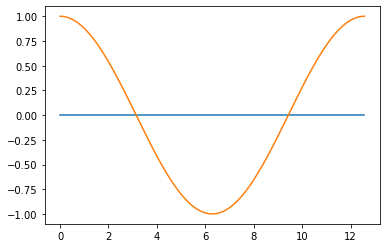

In [59]:
plt.plot(angles,output_states[:,1:])
plt.plot(angles,output_states[:,:1])
plt.show()